- By [lazarusA](https://lazarusa.github.io/Webpage/index.html)

In [1]:
using Legendre, GLMakie
using GeometryBasics, LinearAlgebra, StatsBase
using AbstractPlotting: get_dim, surface_normals

### Tesseral Spherical Harmonics / Real Spherical Harmonics

https://en.wikipedia.org/wiki/Spherical_harmonics

In [2]:
function Y(θ, ϕ, l, m)
    if m < 0 
        return (-1)^m * √2 * Nlm(l, abs(m)) * Plm(l, abs(m), cos(θ)) * sin(abs(m)*ϕ)
    elseif m == 0
        return sqrt((2*l+1)/4π)*Plm(l, m, cos(θ))
    else
        return (-1)^m * √2 * Nlm(l, m) * Plm(l, m, cos(θ)) * cos(m*ϕ)
    end
end

Y (generic function with 1 method)

In [3]:
# Grids of polar and azimuthal angles
θ = LinRange(0, π, 200)
ϕ = LinRange(0, 2π, 200)
x = [sin(θ)*sin(ϕ) for θ in θ, ϕ in ϕ]
y = [sin(θ)*cos(ϕ) for θ in θ, ϕ in ϕ]
z = [cos(θ)        for θ in θ, ϕ in ϕ];

### getting a Mesh

In [4]:
function getMesh(x,y,z)
    positions = vec(map(CartesianIndices(z)) do i
    GeometryBasics.Point{3, Float32}(
        get_dim(x, i, 1, size(z)),
        get_dim(y, i, 2, size(z)),
        z[i])
    end)
    faces = decompose(GLTriangleFace, Rect2D(0f0, 0f0, 1f0, 1f0), size(z))
    normals = surface_normals(x, y, z)
    vertices = GeometryBasics.meta(positions; normals=normals) 
    meshObj = GeometryBasics.Mesh(vertices, faces)
    meshObj 
end

getMesh (generic function with 1 method)

### Example

In [5]:
l = 4
m = 1
Ygrid = [Y(θ, ϕ, l, m) for θ in θ, ϕ in ϕ]
Ylm = abs.(Ygrid)
Ygrid2 = vec(Ygrid);

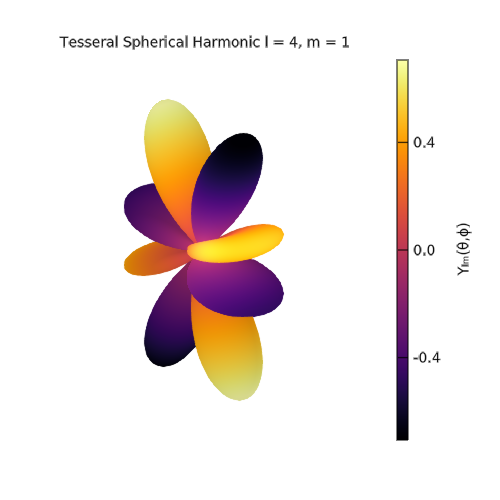

In [6]:
fig, ax, pltobj = mesh(getMesh(Ylm .* x, Ylm .* y, Ylm .* z), color = Ygrid2, 
    colormap = :inferno, shading = true, ambient = Vec3f0(0.85, 0.85, 0.85),
    figure = (resolution = (500, 500), fontsize = 14, backgroundcolor = :white),
    axis = (title = "Tesseral Spherical Harmonic l = $(l), m = $(m)",
        type = Axis3,
        aspect = :data,
    )
    )
cbar = Colorbar(fig, pltobj, label = "Yₗₘ(θ,ϕ)", width = 11, tickalign = 1, tickwidth = 1)

hidespines!(ax)
hidedecorations!(ax)
fig[1,2] = cbar
fig
#save("Y10.png", fig, px_per_unit = 2)

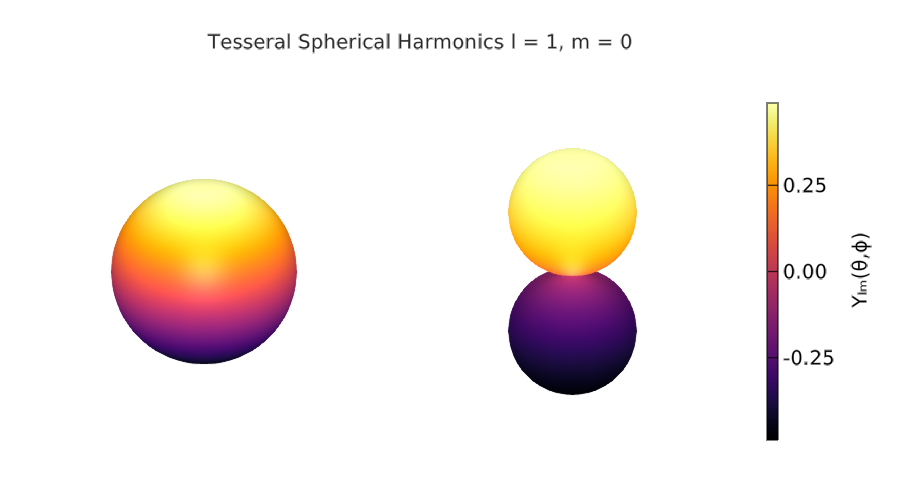

In [7]:
l = 1
m = 0
Ygrid = [Y(θ, ϕ, l, m) for θ in θ, ϕ in ϕ]
Ylm = abs.(Ygrid)
Ygrid2 = vec(Ygrid)
ambient =  Vec3f0(0.85, 0.85, 0.85)
cmap = :inferno
fig = Figure(resolution = (900, 500))
ax1 = Axis3(fig, aspect = :data)
ax2 = Axis3(fig, aspect = :data)
pltobj = mesh!(ax1, getMesh(x, y, z), color = Ygrid2, colormap = cmap, ambient = ambient)
mesh!(ax2, getMesh(Ylm .* x, Ylm .* y, Ylm .* z), color = Ygrid2, colormap = cmap,  ambient = ambient)
hidespines!(ax1)
hidedecorations!(ax1)
hidespines!(ax2)
hidedecorations!(ax2)
cbar = Colorbar(fig, pltobj, label = "Yₗₘ(θ,ϕ)", width = 11, tickalign = 1, tickwidth = 1)
fig[1,1] = ax1
fig[1,2] = ax2
fig[1,3] = cbar
fig[0,:] = Label(fig, "Tesseral Spherical Harmonics l = $(l), m = $(m)", textsize = 20, color = (:black, 0.85))
#GLMakie.trim!(fig.layout)

fig 
#save("sY10.png", fig, px_per_unit = 2)

## All together 

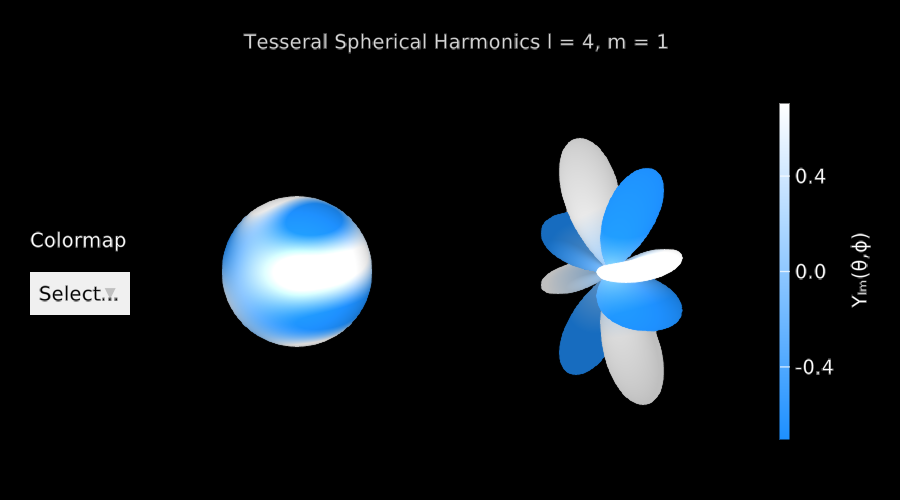

In [8]:
using Legendre, GLMakie
using GeometryBasics, LinearAlgebra, StatsBase
using AbstractPlotting: get_dim, surface_normals

function Y(θ, ϕ, l, m)
    if m < 0 
        return (-1)^m * √2 * Nlm(l, abs(m)) * Plm(l, abs(m), cos(θ)) * sin(abs(m)*ϕ)
    elseif m == 0
        return sqrt((2*l+1)/4π)*Plm(l, m, cos(θ))
    else
        return (-1)^m * √2 * Nlm(l, m) * Plm(l, m, cos(θ)) * cos(m*ϕ)
    end
end
function getMesh(x,y,z)
    positions = vec(map(CartesianIndices(z)) do i
    GeometryBasics.Point{3, Float32}(
        get_dim(x, i, 1, size(z)),
        get_dim(y, i, 2, size(z)),
        z[i])
    end)
    faces = decompose(GLTriangleFace, Rect2D(0f0, 0f0, 1f0, 1f0), size(z))
    normals = surface_normals(x, y, z)
    vertices = GeometryBasics.meta(positions; normals=normals) 
    meshObj = GeometryBasics.Mesh(vertices, faces)
    meshObj 
end

# Grids of polar and azimuthal angles
θ = LinRange(0, π, 200)
ϕ = LinRange(0, 2π, 200)
x = [sin(θ)*sin(ϕ) for θ in θ, ϕ in ϕ]
y = [sin(θ)*cos(ϕ) for θ in θ, ϕ in ϕ]
z = [cos(θ)        for θ in θ, ϕ in ϕ]

l = 4
m = 1

# here the selection must be sequential, first the "l" value and then "m = -l:1:l"
#lval = Node(2) 
#mval = Node(1)

#Ygrid = @lift([Y(θ, ϕ, $(lval), $(mval)) for θ in θ, ϕ in ϕ]).val
#Ylm = abs.(Ygrid)
#Ygrid2 = vec(Ygrid)

ambient =  Vec3f0(0.75, 0.75, 0.75)
cmap = (:dodgerblue, :white) # how to include this into menu options? 

fig = Figure(resolution = (900, 500), backgroundcolor = :black)

menu = Menu(fig, options = ["viridis", "heat", "plasma", "magma"])
#menu2 = Menu(fig, options = collect(1:10))
#menu3 = 
#sl_x = Slider(fig[2, 1], range = 1:1:10, startvalue = 3)

#point = @lift(Point2f0($(sl_x.value), $(sl_y.value)))

Ygrid = [Y(θ, ϕ, l, m) for θ in θ, ϕ in ϕ]
Ylm = abs.(Ygrid)
Ygrid2 = vec(Ygrid)

ax1 = Axis3(fig, aspect = :data)
ax2 = Axis3(fig, aspect = :data)
pltobj1 = mesh!(ax1, getMesh(x, y, z), color = Ygrid2, colormap = cmap, ambient = ambient)
pltobj2 = mesh!(ax2, getMesh(Ylm .* x, Ylm .* y, Ylm .* z), color = Ygrid2, colormap = cmap,  ambient = ambient)
hidespines!(ax1)
hidedecorations!(ax1)
hidespines!(ax2)
hidedecorations!(ax2)
cbar = Colorbar(fig, pltobj1, label = "Yₗₘ(θ,ϕ)", width = 11, tickalign = 1, tickwidth = 1, labelcolor = :white,
        ticklabelcolor = :white,tickcolor = :white)
fig[1,1] = ax1
fig[1,2] = ax2
fig[1,3] = cbar
fig[0,1:2] = Label(fig, "Tesseral Spherical Harmonics l = $(l), m = $(m)", textsize = 20, color = (:white, 0.85))
#GLMakie.trim!(fig.layout)
fig[2, 0] = vgrid!(
    Label(fig, "Colormap", width = nothing, color = :white),
    menu,
    #Label(fig, "l", width = nothing),
    #menu2;
    tellheight = false, width = 100)

on(menu.selection) do s
    pltobj1.colormap = s
    pltobj2.colormap = s
end

fig 
#save("sblackY41_blue.png", fig, px_per_unit = 2)

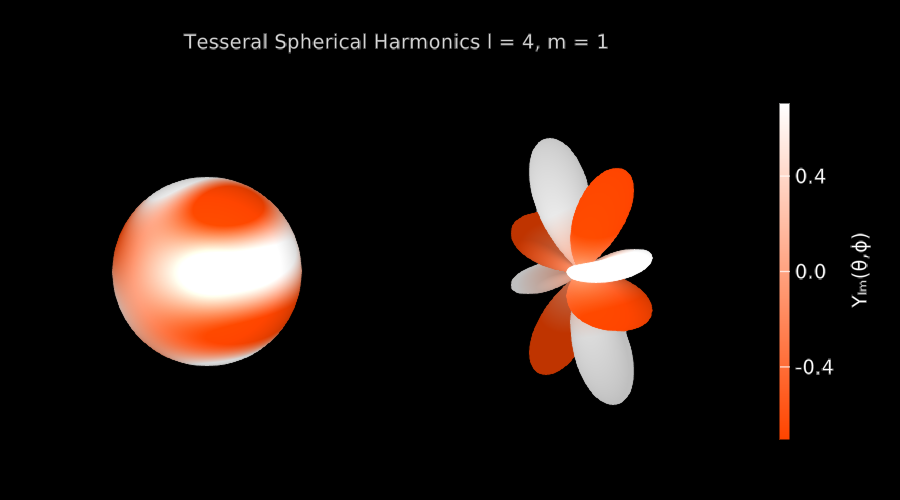

In [9]:
using Legendre, GLMakie
using GeometryBasics, LinearAlgebra, StatsBase
using AbstractPlotting: get_dim, surface_normals

function Y(θ, ϕ, l, m)
    if m < 0 
        return (-1)^m * √2 * Nlm(l, abs(m)) * Plm(l, abs(m), cos(θ)) * sin(abs(m)*ϕ)
    elseif m == 0
        return sqrt((2*l+1)/4π)*Plm(l, m, cos(θ))
    else
        return (-1)^m * √2 * Nlm(l, m) * Plm(l, m, cos(θ)) * cos(m*ϕ)
    end
end
function getMesh(x,y,z)
    positions = vec(map(CartesianIndices(z)) do i
    GeometryBasics.Point{3, Float32}(
        get_dim(x, i, 1, size(z)),
        get_dim(y, i, 2, size(z)),
        z[i])
    end)
    faces = decompose(GLTriangleFace, Rect2D(0f0, 0f0, 1f0, 1f0), size(z))
    normals = surface_normals(x, y, z)
    vertices = GeometryBasics.meta(positions; normals=normals) 
    meshObj = GeometryBasics.Mesh(vertices, faces)
    meshObj 
end

# Grids of polar and azimuthal angles
θ = LinRange(0, π, 200)
ϕ = LinRange(0, 2π, 200)
x = [sin(θ)*sin(ϕ) for θ in θ, ϕ in ϕ]
y = [sin(θ)*cos(ϕ) for θ in θ, ϕ in ϕ]
z = [cos(θ)        for θ in θ, ϕ in ϕ]

l = 4
m = 1

ambient =  Vec3f0(0.75, 0.75, 0.75)
cmap = (:orangered, :white) # how to include this into menu options? 

fig = Figure(resolution = (900, 500), backgroundcolor = :black)

Ygrid = [Y(θ, ϕ, l, m) for θ in θ, ϕ in ϕ]
Ylm = abs.(Ygrid)
Ygrid2 = vec(Ygrid)

ax1 = Axis3(fig, aspect = :data)
ax2 = Axis3(fig, aspect = :data)
pltobj1 = mesh!(ax1, getMesh(x, y, z), color = Ygrid2, colormap = cmap, ambient = ambient)
pltobj2 = mesh!(ax2, getMesh(Ylm .* x, Ylm .* y, Ylm .* z), color = Ygrid2, colormap = cmap,  ambient = ambient)
hidespines!(ax1)
hidedecorations!(ax1)
hidespines!(ax2)
hidedecorations!(ax2)
cbar = Colorbar(fig, pltobj1, label = "Yₗₘ(θ,ϕ)", width = 11, tickalign = 1, tickwidth = 1, labelcolor = :white,
        ticklabelcolor = :white,tickcolor = :white)
fig[1,1] = ax1
fig[1,2] = ax2
fig[1,3] = cbar
fig[0,1:2] = Label(fig, "Tesseral Spherical Harmonics l = $(l), m = $(m)", textsize = 20, color = (:white, 0.85))
#GLMakie.trim!(fig.layout)
fig 
#save("sblackY41.png", fig, px_per_unit = 2)